In [1]:
import drawsvg as draw
import numpy as np
import scipy

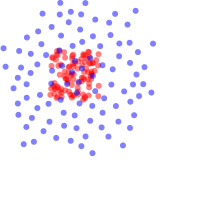

In [120]:
def get_points(n_points, x0, y0, width, height):
    rng = np.random.default_rng(seed=42)
    xs = rng.uniform(low=x0, high=width, size=n_points)
    ys = rng.uniform(low=y0, high=height, size=n_points)
    return np.column_stack((xs,ys))

def draw_points(points, drawing, radius=3, **kwargs):
    for pt in points:
        drawing.append(
            draw.Circle(
                cx=pt[0], 
                cy=pt[1], 
                r=radius,
                **kwargs
            )
        )

x0 = 0
y0 = 0
width = 200
height = 200
n_points = 100

drawing = draw.Drawing(width, height, origin='top-left', displayInline=False)

# points = np.array([[10,10], [49,50], [50,50], [54,54], [55,55]])
points = get_points(n_points, x0=50, y0=50, width=width/2, height=height/2)


point_styles = dict(
    fill='red',
    fill_opacity=.5,
    stroke='black',
    stoke_width=0,
    stroke_opacity=0.0
)
draw_points(points, drawing, **point_styles)


def separate(points):
    new_points = []
    tree = scipy.spatial.KDTree(points)
    for current_index, pt in enumerate(points):
        pt = points[current_index]
        neighbour_radius = 10
        neighbour_indices = np.array(tree.query_ball_point(pt, r=neighbour_radius))
        neighbour_indices = neighbour_indices[neighbour_indices != current_index]
        if neighbour_indices.size > 0:
            diff = pt - points[neighbour_indices]
            new_point = pt + diff.mean(axis=0)
            points[current_index] = new_point
            new_points.append(new_point)
        else:
            new_points.append(pt)
        
    return np.array(new_points)

for i in range(1000):
    points = separate(points)
    
point_styles['fill']='blue'
draw_points(points, drawing, **point_styles)

# Display in Jupyter notebook
drawing.rasterize()  # Display as PNG
drawing  # Display as SVG

34


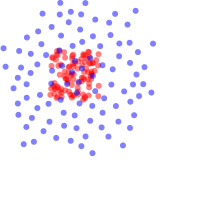

In [165]:
def get_points(n_points, x0, y0, width, height):
    rng = np.random.default_rng(seed=42)
    xs = rng.uniform(low=x0, high=width, size=n_points)
    ys = rng.uniform(low=y0, high=height, size=n_points)
    return np.column_stack((xs,ys))

def draw_points(points, drawing, radius=3, **kwargs):
    for pt in points:
        drawing.append(
            draw.Circle(
                cx=pt[0], 
                cy=pt[1], 
                r=radius,
                **kwargs
            )
        )

x0 = 0
y0 = 0
width = 200
height = 200
n_points = 100

drawing = draw.Drawing(width, height, origin='top-left', displayInline=False)

# points = np.array([[10,10], [49,50], [50,50], [54,54], [55,55]])
points = get_points(n_points, x0=50, y0=50, width=width/2, height=height/2)


point_styles = dict(
    fill='red',
    fill_opacity=.5,
    stroke='black',
    stoke_width=0,
    stroke_opacity=0.0
)
draw_points(points, drawing, **point_styles)


def step_separate(points):
    new_points = []
    tree = scipy.spatial.KDTree(points)
    midpoint = points.mean(axis=0)
    for current_index, pt in enumerate(points):
        pt = points[current_index]
        neighbour_radius = 10
        neighbour_indices = np.array(tree.query_ball_point(pt, r=neighbour_radius))
        neighbour_indices = neighbour_indices[neighbour_indices != current_index]
        if neighbour_indices.size > 0:
            diff = pt - points[neighbour_indices]
            new_point = pt + diff.mean(axis=0)
            points[current_index] = new_point
            new_points.append(new_point)
        else:
            new_points.append(pt)
        
    return np.array(new_points), points.mean(axis=0)

def separate(points, epsilon=0.001, debug=False):
    counter = 0
    while True:
        midpoint = points.mean(axis=0)
        points, new_midpoint = step_separate(points)
        if np.abs(new_midpoint - midpoint).mean() < epsilon:
            break
        counter += 1
    print(counter)
    return points
    
point_styles['fill']='blue'
points= separate(points, debug=True)
draw_points(points, drawing, **point_styles)

# Display in Jupyter notebook
drawing.rasterize()  # Display as PNG
drawing  # Display as SVG

118


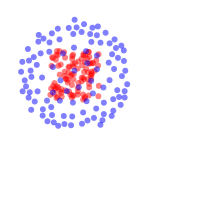

In [226]:
def get_points(n_points, x0, y0, width, height):
    rng = np.random.default_rng(seed=42)
    xs = rng.uniform(low=x0, high=width, size=n_points)
    ys = rng.uniform(low=y0, high=height, size=n_points)
    return np.column_stack((xs,ys))

def draw_points(points, drawing, radius=3, **kwargs):
    for pt in points:
        drawing.append(
            draw.Circle(
                cx=pt[0], 
                cy=pt[1], 
                r=radius,
                **kwargs
            )
        )

x0 = 0
y0 = 0
width = 200
height = 200
n_points = 100

drawing = draw.Drawing(width, height, origin='top-left', displayInline=False)

# points = np.array([[10,10], [49,50], [50,50], [54,54], [55,55]])
points = get_points(n_points, x0=50, y0=50, width=width/2, height=height/2)


point_styles = dict(
    fill='red',
    fill_opacity=.5,
    stroke='black',
    stoke_width=0,
    stroke_opacity=0.0
)
draw_points(points, drawing, **point_styles)


        
def step_separate(points):
    new_points = []
    tree = scipy.spatial.KDTree(points)
    midpoint = points.mean(axis=0)
    radii = scipy.spatial.distance.cdist(np.expand_dims(midpoint, axis=0), points)
    neighbour_radius_scaler = 1.4 - radii / radii.max(axis=1)
    for current_index, pt in enumerate(points):
        pt = points[current_index]
        neighbour_radius = 10 * neighbour_radius_scaler[0][current_index]
        neighbour_indices = np.array(tree.query_ball_point(pt, r=neighbour_radius))
        neighbour_indices = neighbour_indices[neighbour_indices != current_index]
        if neighbour_indices.size > 0:
            diff = pt - points[neighbour_indices]
            new_point = pt + diff.mean(axis=0)
            points[current_index] = new_point
            new_points.append(new_point)
        else:
            new_points.append(pt)
        
    return np.array(new_points), np.array(new_points).mean(axis=0)

def separate(points, epsilon=0.001, debug=False):
    counter = 0
    while True:
        midpoint = points.mean(axis=0)
        points, new_midpoint = step_separate(points)
        if np.abs(new_midpoint - midpoint).mean() < epsilon:
            break
        counter += 1
    print(counter)
    return points
    
point_styles['fill']='blue'
points = separate(points)
draw_points(points, drawing, **point_styles)

# Display in Jupyter notebook
drawing.rasterize()  # Display as PNG
drawing  # Display as SVG

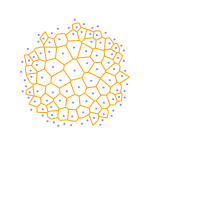

In [295]:
from scipy.spatial import Voronoi

vor = Voronoi(points, qhull_options="QJ")


drawing = draw.Drawing(width, height, origin='top-left', displayInline=False)
midpoint = points.mean(axis=0)
max_dist = scipy.spatial.distance.cdist(np.expand_dims(midpoint, axis=0), points).max()
for a,b in vor.vertices[vor.ridge_vertices]:
    radii = scipy.spatial.distance.cdist(np.expand_dims(midpoint, axis=0), [a,b])[0]
    if np.any(radii > max_dist):
        continue
    drawing.append(draw.Line(*a,*b, stroke='orange', stroke_width=1, stroke_opacity=1.0))


draw_points(points, drawing, radius=1, **point_styles)
    
drawing.rasterize()  # Display as PNG
drawing  # Display as SVG

406


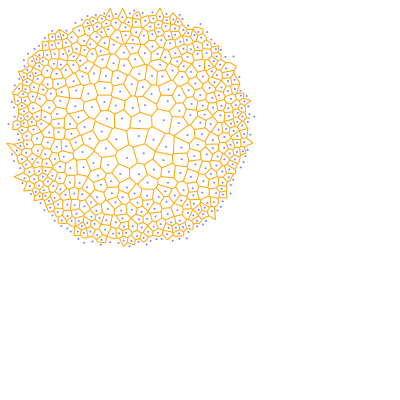

In [315]:
import drawsvg as draw
import numpy as np
import scipy
from scipy.spatial import Voronoi

x0 = 0
y0 = 0
width = 400
height = 400
n_points = 503

drawing = draw.Drawing(width, height, origin='top-left', displayInline=False)

points = get_points(n_points, x0=50, y0=50, width=width/2, height=height/2)


point_styles = dict(
    fill='red',
    fill_opacity=.5,
    stroke='black',
    stoke_width=0,
    stroke_opacity=0.0
)
draw_points(points, drawing, **point_styles)

point_styles['fill']='blue'
points = separate(points)

vor = Voronoi(points, qhull_options="QJ")


drawing = draw.Drawing(width, height, origin='top-left', displayInline=False)
midpoint = points.mean(axis=0)
max_dist = scipy.spatial.distance.cdist(np.expand_dims(midpoint, axis=0), points).max()
for a,b in vor.vertices[vor.ridge_vertices]:
    line_length = np.sqrt((a[0]-b[0])**2 + (a[0]-b[0])**2)
    radii = scipy.spatial.distance.cdist(np.expand_dims(midpoint, axis=0), [a,b])[0]
    if np.any(radii > max_dist):
        continue
    if line_length > max_dist/4:
        continue
    drawing.append(draw.Line(*a,*b, stroke='orange', stroke_width=1, stroke_opacity=1.0))


draw_points(points, drawing, radius=1, **point_styles)
    
drawing.rasterize()  # Display as PNG
drawing  # Display as SVG